In [1]:
import pandas as pd
import pandas_profiling
import numpy as np

In [2]:
data=pd.read_csv("data_test.csv")

In [3]:
print('Number of data points\n : ', data.shape[0])
print("******************** \n")
print('Number of features\n  : ', data.shape[1])
print("******************** \n ")
print('Features : ', data.columns.values)
data.head()

Number of data points
 :  50000
******************** 

Number of features
  :  38
******************** 
 
Features :  ['sesno' 'actno' 'nasno' 'start' 'lastupd' 'bytesin' 'bytesout' 'state'
 'closedt' 'closereason' 'lastbytesin' 'lastbytesout' 'bytepulse'
 'timepulse' 'subsno' 'internalid' 'ipaddr' 'macaddr' 'cpno' 'devid'
 'svctype' 'snatip' 'qosno' 'agentid' 'extlocation' 'extnasip' 'extnasid'
 'userid' 'fupuploadbytes' 'fupdownloadbytes' 'fupseconds' 'accessopname'
 'session_charge' 'multi_acct_id' 'proxyno' 'nasid' 'nasip' 'userid-2']


,sesno,actno,nasno,start,lastupd,bytesin,bytesout,state,closedt,closereason,...,fupuploadbytes,fupdownloadbytes,fupseconds,accessopname,session_charge,multi_acct_id,proxyno,nasid,nasip,userid-2
0,1,4,1,2019-08-31 18:07:23.226076,2019-08-31 18:13:20.226076,323316,311381,C,NaN,6,...,0,0,0,NaN,NaN,NaN,NaN,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser
1,2,4,1,2019-08-31 18:28:22.848888,2019-08-31 18:30:37.848888,143327,59698,C,NaN,6,...,0,0,0,NaN,NaN,NaN,NaN,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser
2,4,4,1,2019-08-31 18:35:54.926522,2019-08-31 18:37:01.926522,19858,16736,C,NaN,6,...,0,0,0,NaN,NaN,NaN,NaN,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser
3,3,4,1,2019-08-31 18:31:32.666854,2019-08-31 18:35:34.666854,60325,82050,C,NaN,6,...,0,0,0,NaN,NaN,NaN,NaN,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser
4,5,4,1,2019-08-31 18:37:19.775424,2019-08-31 18:43:45.775424,37628,53620,C,NaN,6,...,0,0,0,NaN,NaN,NaN,NaN,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser


In [3]:
data.columns

Index(['sesno', 'actno', 'nasno', 'start', 'lastupd', 'bytesin', 'bytesout',
       'state', 'closedt', 'closereason', 'lastbytesin', 'lastbytesout',
       'bytepulse', 'timepulse', 'subsno', 'internalid', 'ipaddr', 'macaddr',
       'cpno', 'devid', 'svctype', 'snatip', 'qosno', 'agentid', 'extlocation',
       'extnasip', 'extnasid', 'userid', 'fupuploadbytes', 'fupdownloadbytes',
       'fupseconds', 'accessopname', 'session_charge', 'multi_acct_id',
       'proxyno', 'nasid', 'nasip', 'userid-2'],
      dtype='object')

In [89]:
data.describe()

,sesno,actno,nasno,bytesin,bytesout,closedt,closereason,lastbytesin,lastbytesout,bytepulse,...,accessopname,session_charge,multi_acct_id,proxyno,session_duration,duration_minutes,day,hour,minute,end_hour
count,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,0.0,50000.00000,0.0,0.0,50000.0,...,0.0,0.0,0.0,0.0,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25754.416440,372.753940,1.361740,3.076771e+06,2.652597e+07,NaN,4.12652,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,0 days 00:20:37.861820,20.631030,3.494840,15.118660,29.583760,15.429740
std,14863.777337,1168.286462,0.480509,2.578459e+07,1.108968e+08,NaN,0.89087,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,0 days 00:55:44.910238,55.748504,0.854908,4.266027,17.048195,4.298985
min,1.000000,4.000000,1.000000,0.000000e+00,0.000000e+00,NaN,1.00000,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,0 days 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13044.750000,4.000000,1.000000,9.510000e+02,6.700000e+02,NaN,4.00000,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,0 days 00:14:35,14.583333,3.000000,12.000000,15.000000,12.000000
50%,25641.500000,4.000000,1.000000,1.613100e+04,8.035000e+03,NaN,4.00000,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,0 days 00:14:52,14.866667,4.000000,17.000000,29.000000,17.000000
75%,38347.250000,4.000000,2.000000,1.223095e+05,5.926050e+04,NaN,4.00000,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,0 days 00:19:34,19.566667,4.000000,18.000000,44.000000,18.000000
max,136319.000000,18691.000000,2.000000,9.582576e+08,2.865270e+09,NaN,17.00000,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,2 days 18:47:35,4007.583333,6.000000,23.000000,59.000000,23.000000


In [6]:
data['closedt'].isna().sum()

50000

In [7]:
data["lastbytesin"].isna().sum()

50000

In [8]:
data["lastbytesout"].isna().sum()

50000

In [9]:
data["extnasip"].isna().sum()

50000

In [10]:
data["extnasid"].isna().sum()

50000

In [11]:
data["accessopname"].isna().sum()

50000

In [12]:
data["session_charge"].isna().sum()

50000

In [13]:
pandas_profiling.ProfileReport(data)

Number of variables,38
Number of observations,50000
Total Missing (%),38.3%
Total size in memory,14.5 MiB
Average record size in memory,304.0 B
Numeric,5
Categorical,8
Boolean,1
Date,0
Text (Unique),2
Rejected,22


# observation

- Most features have NUll or constant value so these features can be ignored
- Useful features are start,lastupd,bytesin,bytesout

In [14]:
sdate=data["start"]
sdate= pd.to_datetime(sdate) 

In [15]:
edate=data["lastupd"]
edate= pd.to_datetime(edate) 

In [16]:
time_duration = edate-sdate
print(time_duration)

0       00:05:57
1       00:02:15
2       00:01:07
3       00:04:02
4       00:06:26
5       00:03:32
6       00:01:15
7       00:03:33
8       00:01:49
9       00:00:51
10      01:00:46
11      05:52:46
12      00:19:38
13      07:36:30
14      00:11:26
15      00:15:49
16      01:19:34
17      00:14:55
18      00:07:51
19      00:18:29
20      00:03:53
21      01:51:50
22      02:11:42
23      02:34:33
24      01:36:28
25      00:27:40
26      00:01:02
27      00:03:27
28      00:20:06
29      01:35:20
          ...   
49970   00:15:07
49971   00:20:02
49972   00:20:07
49973   00:15:11
49974   00:20:12
49975   00:15:11
49976   00:24:52
49977   00:30:18
49978   00:30:04
49979   00:34:54
49980   00:39:55
49981   00:40:12
49982   00:14:53
49983   00:20:19
49984   00:14:56
49985   00:15:08
49986   01:10:04
49987   01:24:53
49988   00:59:53
49989   00:55:03
49990   00:15:03
49991   00:50:15
49992   01:20:17
49993   01:04:51
49994   00:59:51
49995   00:02:04
49996   00:02:02
49997   00:02:

In [17]:
data["session_duration"] = list(time_duration)

In [ ]:
# added a new feature session_duration

In [19]:
data.head()

,sesno,actno,nasno,start,lastupd,bytesin,bytesout,state,closedt,closereason,...,fupdownloadbytes,fupseconds,accessopname,session_charge,multi_acct_id,proxyno,nasid,nasip,userid-2,session_duration
0,1,4,1,2019-08-31 18:07:23.226076,2019-08-31 18:13:20.226076,323316,311381,C,NaN,6,...,0,0,NaN,NaN,NaN,NaN,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,00:05:57
1,2,4,1,2019-08-31 18:28:22.848888,2019-08-31 18:30:37.848888,143327,59698,C,NaN,6,...,0,0,NaN,NaN,NaN,NaN,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,00:02:15
2,4,4,1,2019-08-31 18:35:54.926522,2019-08-31 18:37:01.926522,19858,16736,C,NaN,6,...,0,0,NaN,NaN,NaN,NaN,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,00:01:07
3,3,4,1,2019-08-31 18:31:32.666854,2019-08-31 18:35:34.666854,60325,82050,C,NaN,6,...,0,0,NaN,NaN,NaN,NaN,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,00:04:02
4,5,4,1,2019-08-31 18:37:19.775424,2019-08-31 18:43:45.775424,37628,53620,C,NaN,6,...,0,0,NaN,NaN,NaN,NaN,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,00:06:26


In [20]:
data["session_duration"].describe()

count                     50000
mean     0 days 00:20:37.861820
std      0 days 00:55:44.910238
min             0 days 00:00:00
25%             0 days 00:14:35
50%             0 days 00:14:52
75%             0 days 00:19:34
max             2 days 18:47:35
Name: session_duration, dtype: object

## Summary

- Nearly 75% of the users have a session duration of less than 19 minutes and max session duration recorded was lasting more than 2 days

In [26]:
import time
import datetime

In [27]:

def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S.%f").timetuple())

In [28]:
 duration = data[['start','lastupd']]
    #pickups and dropoffs to unix time
duration_start = [convert_to_unix(x) for x in duration['start'].values]
duration_end = [convert_to_unix(x) for x in duration['lastupd'].values]
    #calculate duration of trips
durations = (np.array(duration_end) - np.array(duration_start))/float(60)

In [29]:
print(durations)

[ 5.95        2.25        1.11666667 ...  2.1        14.51666667
 14.56666667]


In [30]:
data["duration_minutes"] = durations

In [31]:
data.head()

,sesno,actno,nasno,start,lastupd,bytesin,bytesout,state,closedt,closereason,...,fupseconds,accessopname,session_charge,multi_acct_id,proxyno,nasid,nasip,userid-2,session_duration,duration_minutes
0,1,4,1,2019-08-31 18:07:23.226076,2019-08-31 18:13:20.226076,323316,311381,C,NaN,6,...,0,NaN,NaN,NaN,NaN,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,00:05:57,5.950000
1,2,4,1,2019-08-31 18:28:22.848888,2019-08-31 18:30:37.848888,143327,59698,C,NaN,6,...,0,NaN,NaN,NaN,NaN,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,00:02:15,2.250000
2,4,4,1,2019-08-31 18:35:54.926522,2019-08-31 18:37:01.926522,19858,16736,C,NaN,6,...,0,NaN,NaN,NaN,NaN,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,00:01:07,1.116667
3,3,4,1,2019-08-31 18:31:32.666854,2019-08-31 18:35:34.666854,60325,82050,C,NaN,6,...,0,NaN,NaN,NaN,NaN,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,00:04:02,4.033333
4,5,4,1,2019-08-31 18:37:19.775424,2019-08-31 18:43:45.775424,37628,53620,C,NaN,6,...,0,NaN,NaN,NaN,NaN,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,00:06:26,6.433333


In [32]:
#looking further from the 99th percecntile
for i in range(90,100):
    var =data["duration_minutes"].values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 30.283333333333335
91 percentile value is 34.916666666666664
92 percentile value is 35.28333333333333
93 percentile value is 40.016666666666666
94 percentile value is 44.9
95 percentile value is 49.88333333333333
96 percentile value is 54.95
97 percentile value is 60.233333333333334
98 percentile value is 74.61666666666666
99 percentile value is 95.01666666666667
100 percentile value is  4007.5833333333335


# observation

- 99 percent of the users have a session duration of less than 95 minutes

In [33]:

data['Start Time'] = pd.to_datetime(data['start'])

data['day'] = data['Start Time'].dt.dayofweek


popular_day = data['day'].mode()[0]
print('\n\nThe most common day of the week is\n')
print(":-")
print(popular_day)



The most common day of the week is

:-
4


# observation 

- The day traffic is maximum is Day 4 (Friday) Days are numbered from 0-6(Mon-Sunday)

In [34]:

data['hour'] = data['Start Time'].dt.hour
popular_hour = data['hour'].mode()[0]

data["minute"]=data["Start Time"].dt.minute
popular_minute =data["minute"].mode()[0]
print('\n\nThe most common start hour is\n')
print(":-")
print(popular_hour)
print("********")
print('\n\nThe most common start minute is \n')
print(popular_minute)







The most common start hour is

:-
18
********


The most common start minute is 

16


In [35]:
data["Last Time"] = pd.to_datetime(data['lastupd'])

data['end_hour'] = data['Last Time'].dt.hour
popular_hour = data['end_hour'].mode()[0]

print('\n\n The most common end hour is\n')
print(":-")
print(popular_hour)




 The most common end hour is

:-
18


# summary

- Since 96 % of the data points have a session duration of less than 55 minutes, and maximum occuring start hour is 18:00 
- so duration in which we can expect max traffic is between (19:17 - 20:12)

In [36]:
data.columns

Index(['sesno', 'actno', 'nasno', 'start', 'lastupd', 'bytesin', 'bytesout',
       'state', 'closedt', 'closereason', 'lastbytesin', 'lastbytesout',
       'bytepulse', 'timepulse', 'subsno', 'internalid', 'ipaddr', 'macaddr',
       'cpno', 'devid', 'svctype', 'snatip', 'qosno', 'agentid', 'extlocation',
       'extnasip', 'extnasid', 'userid', 'fupuploadbytes', 'fupdownloadbytes',
       'fupseconds', 'accessopname', 'session_charge', 'multi_acct_id',
       'proxyno', 'nasid', 'nasip', 'userid-2', 'session_duration',
       'duration_minutes', 'Start Time', 'day', 'hour', 'minute', 'Last Time',
       'end_hour'],
      dtype='object')

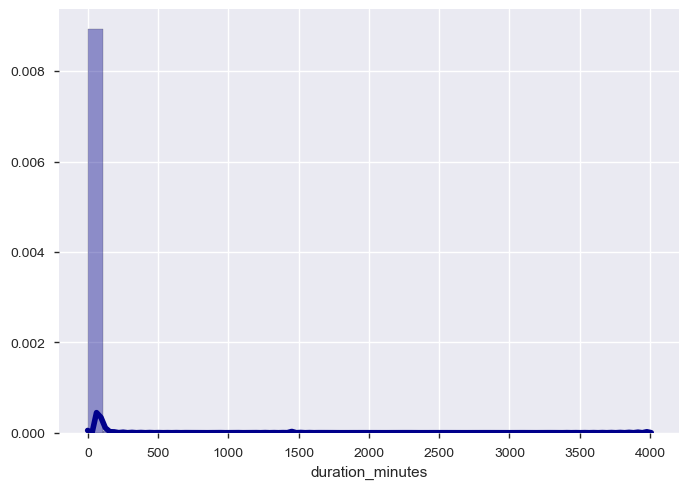

In [38]:
# Density Plot and Histogram of all arrival delays
sns.distplot(data['duration_minutes'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [55]:
unique_duration = data['duration_minutes'].value_counts()
print('Number of Unique durations :', unique_duration.shape[0])

Number of Unique durations : 2016


In [77]:
data["hour"].value_counts(normalize=True) 

18    0.18404
17    0.17170
16    0.14068
19    0.05190
10    0.04492
9     0.04490
20    0.03790
11    0.03756
8     0.03736
13    0.03566
12    0.03430
14    0.03242
21    0.03160
15    0.03036
7     0.02484
22    0.01674
6     0.01554
23    0.00822
5     0.00656
0     0.00466
4     0.00314
1     0.00266
3     0.00150
2     0.00084
Name: hour, dtype: float64

In [78]:
data["minute"].value_counts(normalize=True) 

16    0.02068
18    0.01886
23    0.01882
17    0.01836
19    0.01816
39    0.01802
15    0.01798
28    0.01790
35    0.01778
42    0.01770
26    0.01764
29    0.01760
44    0.01758
33    0.01752
22    0.01744
21    0.01742
30    0.01736
25    0.01724
41    0.01724
32    0.01718
59    0.01718
3     0.01716
20    0.01692
54    0.01692
43    0.01688
51    0.01680
11    0.01680
37    0.01680
24    0.01676
47    0.01662
12    0.01650
45    0.01650
48    0.01648
38    0.01646
4     0.01646
14    0.01644
27    0.01644
56    0.01638
52    0.01630
36    0.01620
46    0.01604
49    0.01602
55    0.01600
0     0.01594
58    0.01590
57    0.01574
31    0.01574
40    0.01570
10    0.01568
7     0.01552
53    0.01548
50    0.01546
8     0.01544
6     0.01536
34    0.01520
9     0.01482
13    0.01474
2     0.01464
1     0.01462
5     0.01448
Name: minute, dtype: float64

# Summary

-we observe that 19:17 -  20:12  is the most busiest period

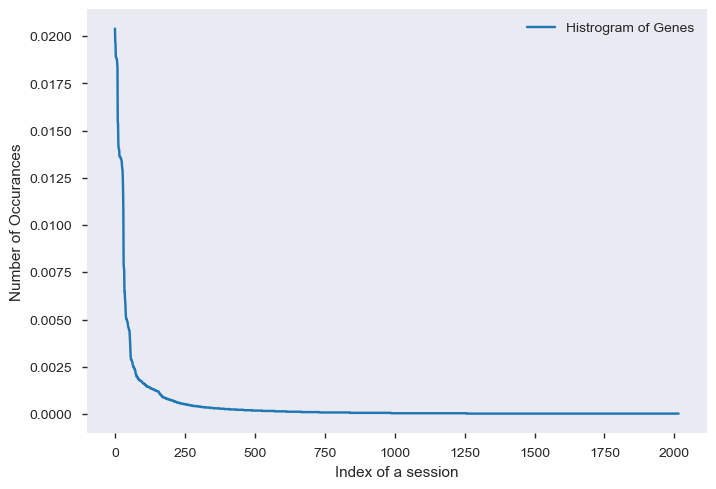

In [56]:

s = sum(unique_duration.values);
h = unique_duration.values/s;
plt.plot(h, label="Histrogram of Genes")
plt.xlabel('Time duration')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid(true)
plt.show()

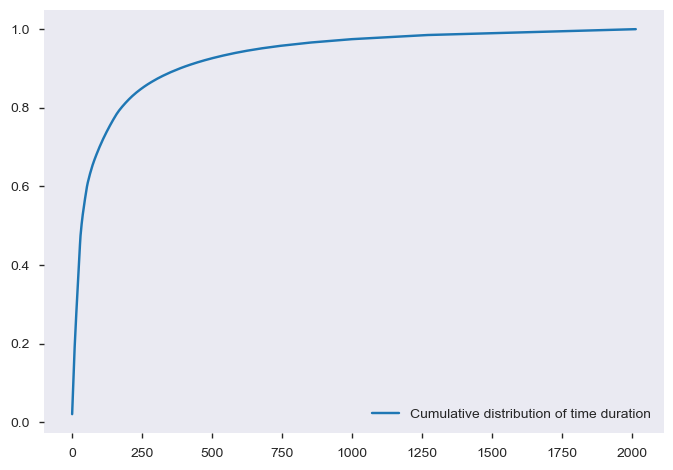

In [59]:

c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of time duration')
plt.grid()
plt.legend()
plt.show()

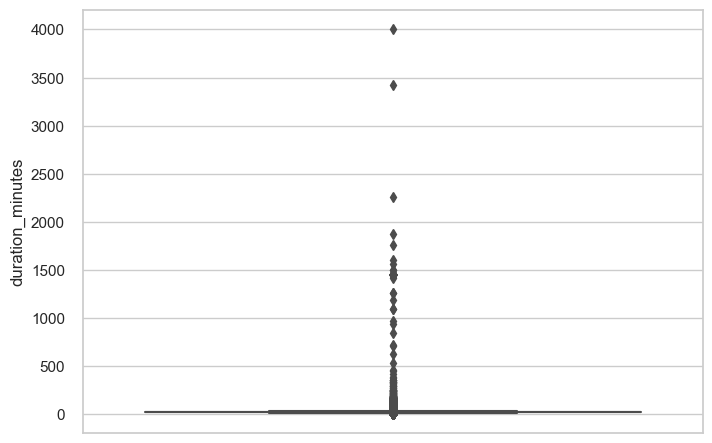

In [67]:
import seaborn as sns
sns.set(style="whitegrid")

ax = sns.boxplot(x=data["duration_minutes"],orient="v")

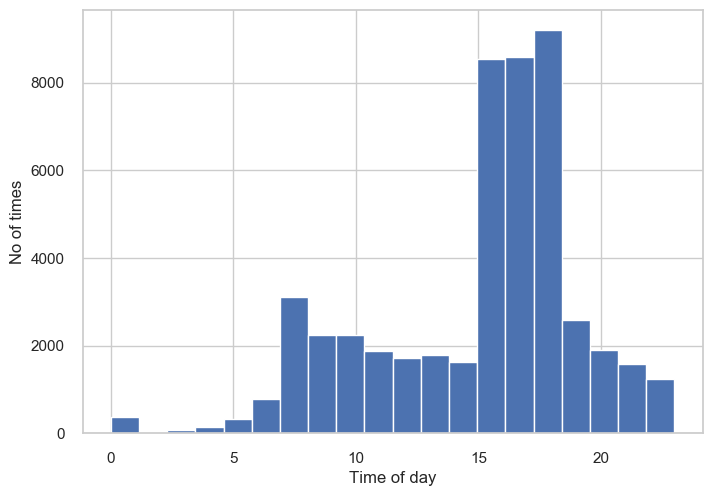

In [69]:
x = data["hour"]
plt.hist(x, bins=20)
plt.ylabel('No of times ')
plt.xlabel("Time of day")
plt.show()

# observation

- Maximum traffic occurs in the hours of 16:00-18:00

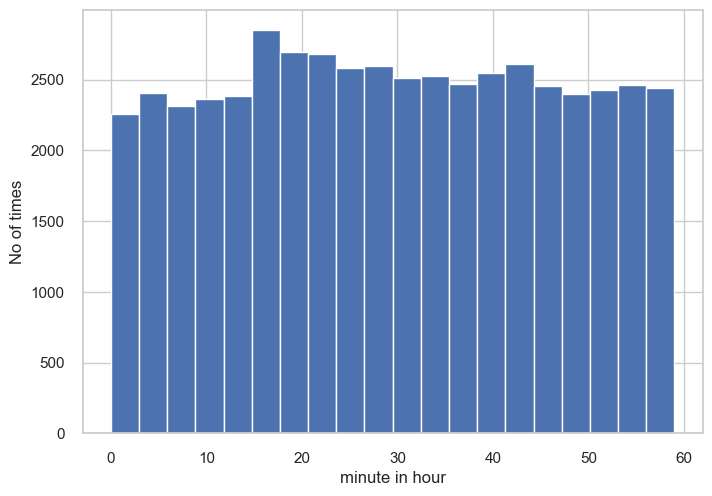

In [72]:
x_minute=data["minute"]
plt.hist(x_minute, bins=20)
plt.ylabel('No of times')
plt.xlabel('minute in hour')
plt.show()

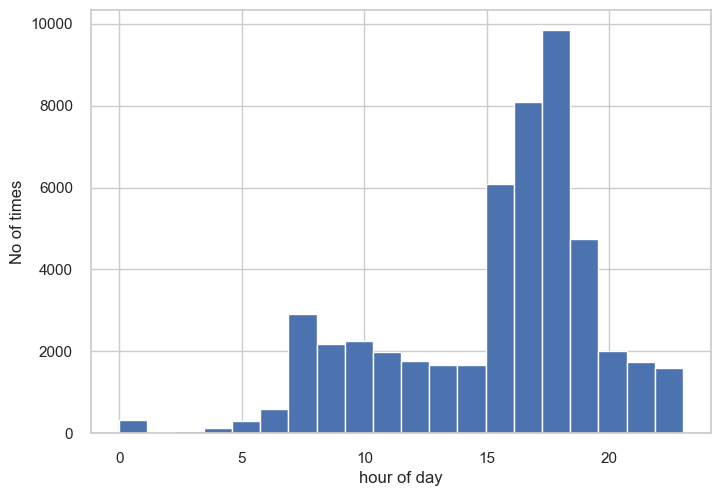

In [73]:
x_end=data["end_hour"]
plt.hist(x_end, bins=20)
plt.ylabel('No of times')
plt.xlabel('hour of day')
plt.show()

In [74]:
group_time_start=data.groupby("hour")
group_time_start.first()

,sesno,actno,nasno,start,lastupd,bytesin,bytesout,state,closedt,closereason,...,nasid,nasip,userid-2,session_duration,duration_minutes,Start Time,day,minute,Last Time,end_hour
hour,,,,,,,,,,,,,,,,,,,,,
0,31,4,1,2019-09-02 00:21:20.652516,2019-09-02 00:23:26.652516,148462,460374,C,NaN,6,...,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,0 days 00:02:06,2.100000,2019-09-02 00:21:20.652516,0,21,2019-09-02 00:23:26.652516,0
1,13,4,1,2019-09-01 01:58:43.243091,2019-09-01 02:18:21.243091,749821,9778173,C,NaN,6,...,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,0 days 00:19:38,19.633333,2019-09-01 01:58:43.243091,6,58,2019-09-01 02:18:21.243091,2
2,14,4,1,2019-09-01 02:18:28.454476,2019-09-01 09:54:58.454476,904710,6187965,C,NaN,6,...,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,0 days 07:36:30,456.500000,2019-09-01 02:18:28.454476,6,18,2019-09-01 09:54:58.454476,9
3,37,4,1,2019-09-02 03:40:37.096921,2019-09-02 03:47:13.096921,72878,356971,C,NaN,6,...,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,0 days 00:06:36,6.600000,2019-09-02 03:40:37.096921,0,40,2019-09-02 03:47:13.096921,3
4,40,4,1,2019-09-02 04:00:39.854469,2019-09-04 13:05:49.854469,7379520,136831655,C,NaN,6,...,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,2 days 09:05:10,3425.166667,2019-09-02 04:00:39.854469,0,0,2019-09-04 13:05:49.854469,13
5,98,4,1,2019-09-05 05:27:08.011236,2019-09-05 05:42:01.011236,80714,12053,C,NaN,4,...,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,0 days 00:14:53,14.883333,2019-09-05 05:27:08.011236,3,27,2019-09-05 05:42:01.011236,5
6,161,4,1,2019-09-06 06:24:55.337842,2019-09-06 06:39:29.337842,4914,3237,C,NaN,4,...,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,0 days 00:14:34,14.566667,2019-09-06 06:24:55.337842,4,24,2019-09-06 06:39:29.337842,6
7,100,4,1,2019-09-05 07:34:39.006828,2019-09-05 07:36:44.006828,0,0,C,NaN,4,...,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,0 days 00:02:05,2.083333,2019-09-05 07:34:39.006828,3,34,2019-09-05 07:36:44.006828,7
8,101,4,1,2019-09-05 08:03:15.948019,2019-09-05 08:22:55.948019,4207,2496,C,NaN,4,...,ERS-J480-BNG-R-T2-SR,172.31.32.61,publicwifiuser,0 days 00:19:40,19.666667,2019-09-05 08:03:15.948019,3,3,2019-09-05 08:22:55.948019,8


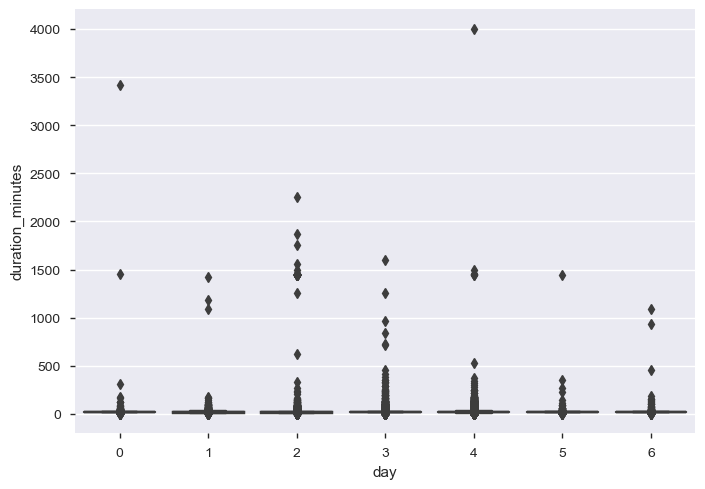

In [82]:
 ax = sns.boxplot(x=data["day"], y=data["duration_minutes"], data=data)

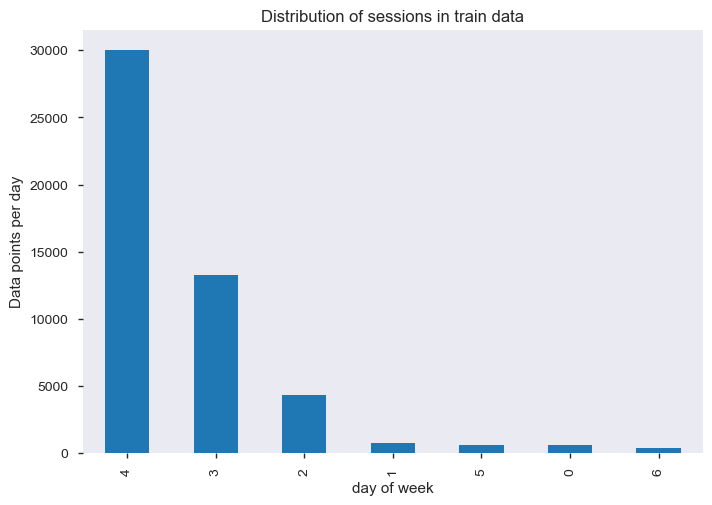

In [86]:

# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = data['day'].value_counts()
#test_class_distribution = test_df['Class'].value_counts().sortlevel()
#cv_class_distribution = cv_df['Class'].value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('day of week')
plt.ylabel('Data points per day')
plt.title('Distribution of sessions in train data')
plt.grid()
plt.show()

# summary

- Monday is day 0 and sunday is day 6.

- ## so friday is the day we have maximum traffic in the time period 19:17-20:12

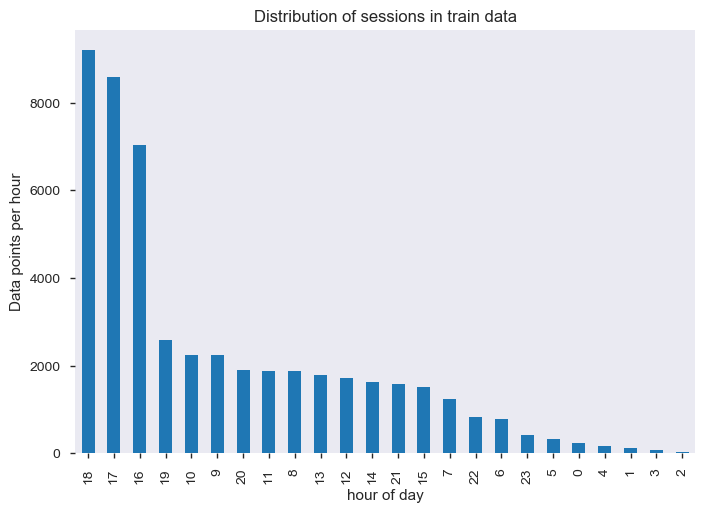

In [87]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution_hour = data['hour'].value_counts()
#test_class_distribution = test_df['Class'].value_counts().sortlevel()
#cv_class_distribution = cv_df['Class'].value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution_hour.plot(kind='bar')
plt.xlabel('hour of day')
plt.ylabel('Data points per hour')
plt.title('Distribution of sessions in train data')
plt.grid()
plt.show()